## Docker
On Jimi's GPU machine: 
`docker run -d -p 8888:8888 -p 6006:6006 -v /home/user:/root/shared --runtime=nvidia vovacher/dl3:gpu`

On Azure machine: 
`sudo nvidia-docker run --runtime=nvidia -d -p 8888:8888 -p 6006:6006 -v /home/johndoe:/root/shared  vovacher/dl3:gpu`

On Azure machine try without the `--runtime=nvidia`

`sudo nvidia-docker run -d -p 8888:8888 -p 6006:6006 -v /home/johndoe:/root/shared  vovacher/dl3:gpu`

docker rmi $(docker images -q --filter "dangling=true")


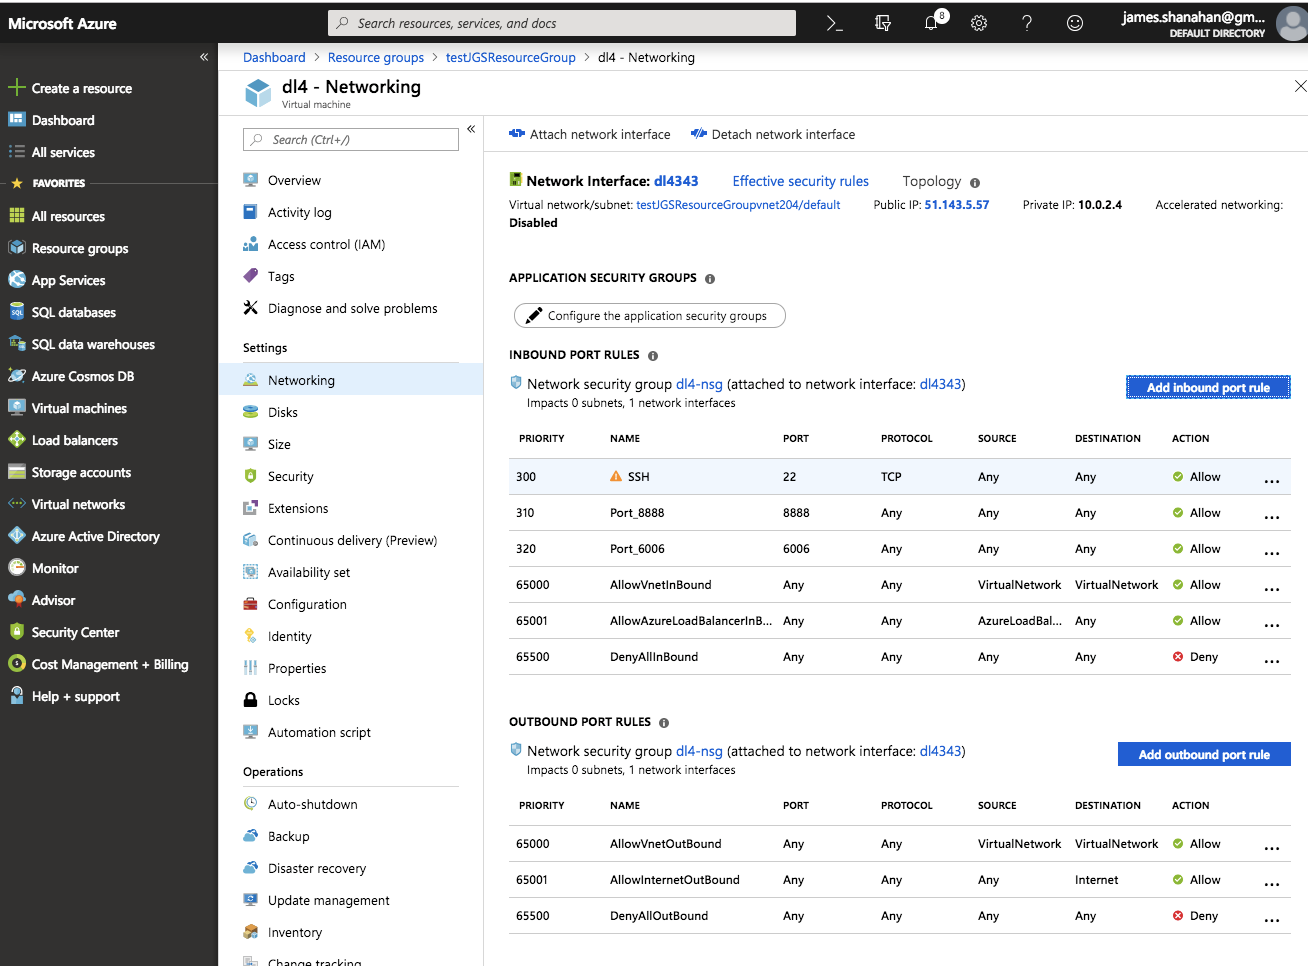

## How can I run Keras on GPU?

If you are running on the TensorFlow (or CNTK) backends, your code will automatically run on GPU if any available GPU is detected.

### How can I run a Keras model on multiple GPUs?

There are two ways to run a single model on multiple GPUs: data parallelism and device parallelism.

In most cases, what you need is most likely data parallelism.

#### Data parallelism

Data parallelism consists in replicating the target model once on each device, and using each replica to process a different fraction of the input data. Keras has a built-in utility, keras.utils.multi_gpu_model, which can produce a data-parallel version of any model, and achieves quasi-linear speedup on up to 8 GPUs.

For more information, see the documentation for multi_gpu_model. Here is a quick example:

from keras.utils import multi_gpu_model

```
# Replicates `model` on 8 GPUs.
# This assumes that your machine has 8 available GPUs.
parallel_model = multi_gpu_model(model, gpus=8)
parallel_model.compile(loss='categorical_crossentropy',
                       optimizer='rmsprop')

# This `fit` call will be distributed on 8 GPUs.
# Since the batch size is 256, each GPU will process 32 samples.
parallel_model.fit(x, y, epochs=20, batch_size=256)
```
#### Device parallelism

Device parallelism consists in running different parts of a same model on different devices. It works best for models that have a parallel architecture, e.g. a model with two branches. 


## Pick a GPU to work on (make sure it is free!)


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

# should return
#['/job:localhost/replica:0/task:0/device:GPU:0']

#if it returns [] then GPU there may be a GPU driver problem

['/job:localhost/replica:0/task:0/device:GPU:0']

Notice how it grabs all the GPU memory immediately (eventhough it has done nothing so far)

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1", "2", "3"
os.environ["CUDA_VISIBLE_DEVICES"]="1" 
 
# Do other imports now...
import keras
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

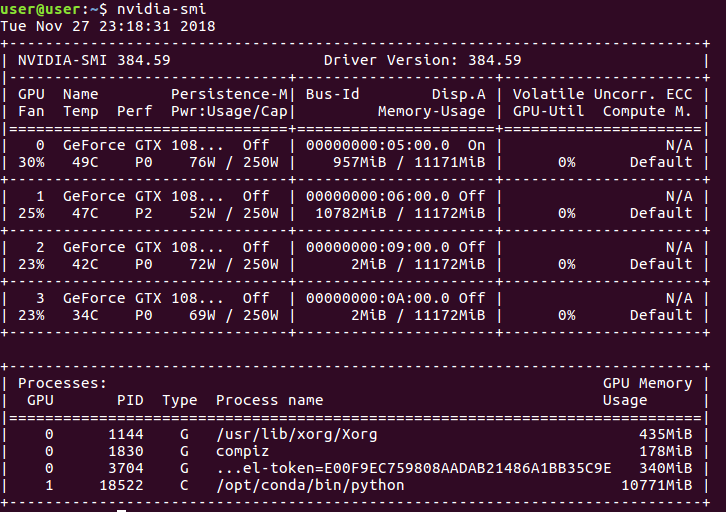

Make sure to load up the GPUs (push their utility up!

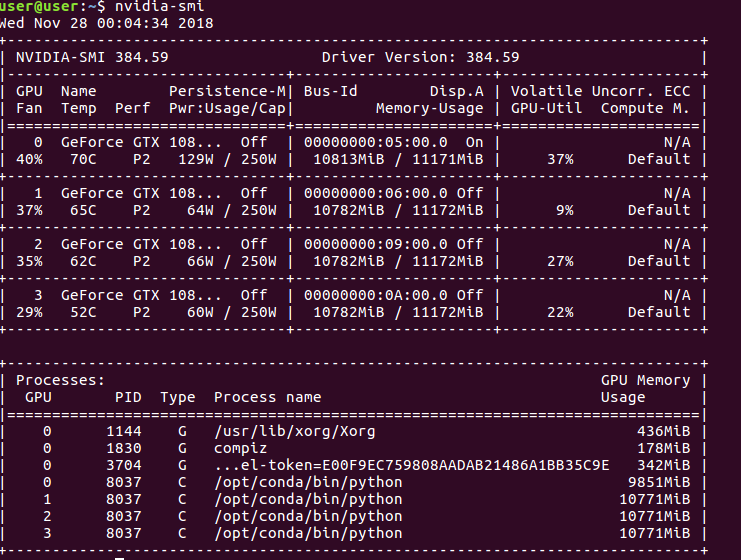

## Release GPUs' memory (so others can use them!)

If you have a separate notebook running you might the GPUs. The following command releases the memory in the GPUs.

`K.clear_session()`



## Cross check using nvidia-smi  on CMD line


On the command line run and check its output for running `Processes`:

`nvidia-smi`

When running a single GPU machine make sure to kill all processes that are running on your GPU. In the example below, there is one process running on the GPU (PID=1048). You will need to kill this process first using: `sudo kill -9 1048`. If you dont the GPU will run out of memory. Then restart the notebook to engage the GPU.

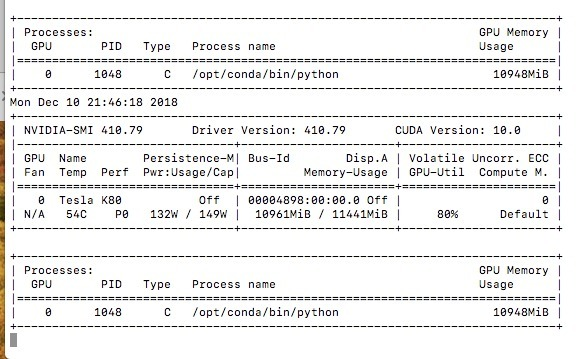

## Which GPU am I using?

To check if you really are utilizing all of your GPUs, specifically NVIDIA ones, you can monitor your usage in the terminal using:

`watch -n0.5 nvidia-smi`

In [32]:
#Check the GPUs
#!nvidia-smi

Mon Nov 26 00:23:29 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.59                 Driver Version: 384.59                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0  On |                  N/A |
| 29%   52C    P2    61W / 250W |  10818MiB / 11171MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   41C    P8    16W / 250W |  11155MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

# Train Alexnet on CIFAR 10
In 2012, the deep learning networks created by Alex Krizhevsky, Geoffrey Hinton and Ilya Sutskever (now largely know as AlexNet) blew everyone out of the water to win Image Classification Challenge (ILSVRC). This heralded the new era of deep learning. AlexNet is the most influential modern deep learning networks in machine vision that use multiple convolutional and dense layers and distributed computing with GPU.

Like LeNet-5, AlexNet is one of the most important & influential neural network architectures that demonstrate the power of convolutional layers in machine vision. So, let’s build AlexNet with Keras first, them move onto building it in 

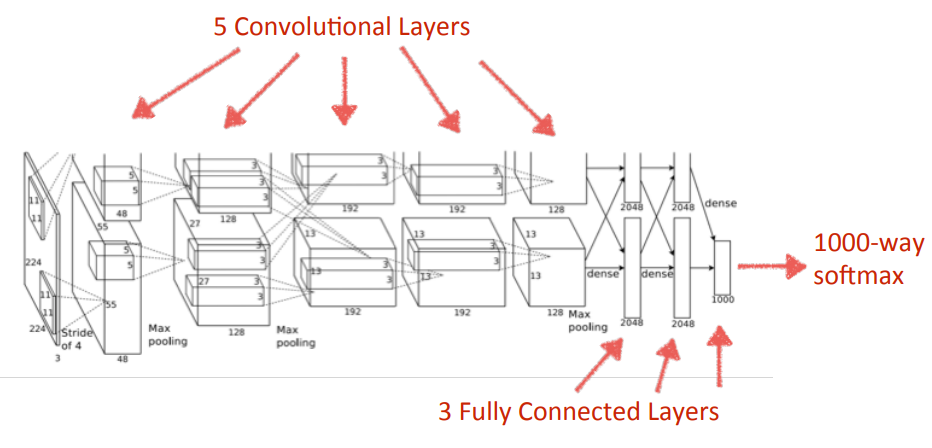

## AlexNet in Keras

Here we make a few changes in order to simplify a few things and further optimise the training outcome. 
* First of all, we use the sequential model and eliminating the parallelism for simplification. 
  * For example, the first convolutional layer had 2 layers with 48 neurons each. Instead, we combine it to 98 neurons.
* The original architecture did not have batch normalisation after every layer (although it had normalisation between a few layers) and dropouts. Here we put a batch normalisation layer before the input after every layer and dropouts between the fully-connected layers to reduce overfitting.
  * When to use batch normalisation is difficult. Everyone seems to have opinions or evidence that supports their opinions. Without going into too much details, I decided to normalise before the input as it seems to make sense statistically.
  
  

## Train AlexNet model on Cifar10 data
Using the  code provided below as a basis, where AlexNet is specified using the  sequential API,  and train the AlexNet network on the Cifar10 dataset which is also introduced below. 

### Summarize  your network
Summarize your network using the following:
1. Summarize your Model using:  
`from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())`
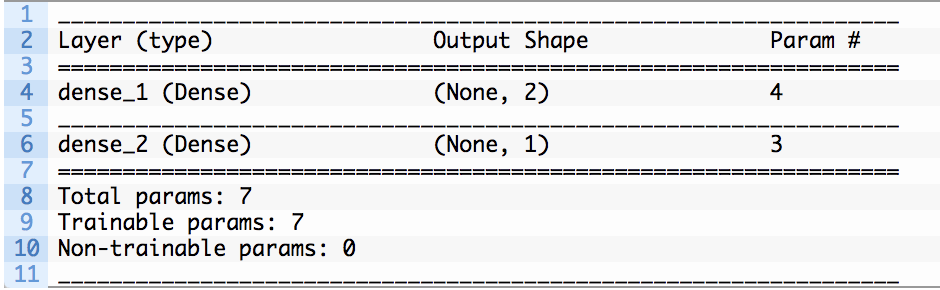


### Visualize your model
* Visualize  your model as follows:

`from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)`

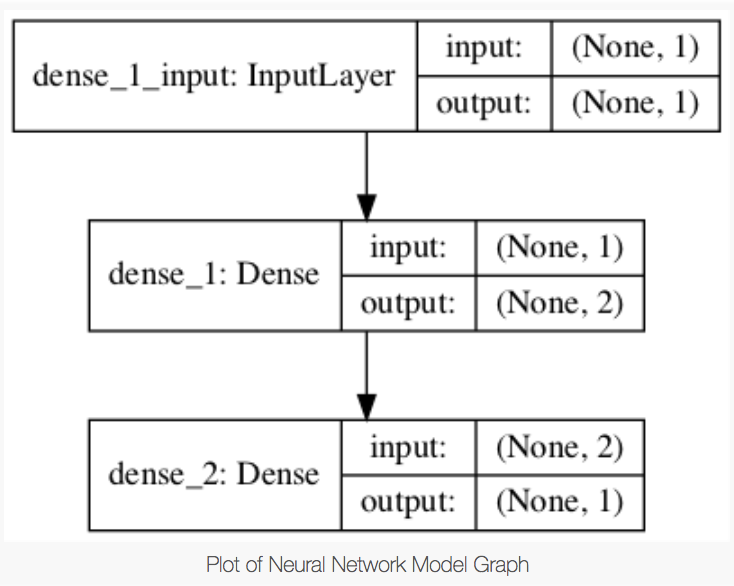

### Report your results and discuss
Please report your experimental results using the following format and discuss key findings (please try multiple experimental hyperparameter settings if time permits):

| Model |	Detail|	Input size|	Top-1 Test Acc|	Param(M)|	Mult-Adds (B)| Depth|train time|Num of Epochs|batchsize|GPU desc|
| ------------- |:-------------:| -----|---------|---------|---------|----|---|---|
| AlexNet|	XXXX	|224x224|	XXX|	60M|	XXB|	 XX |XXX|XXX|XXX|XXX|


In addition, produce training progress plots like the following and discuss your findings:

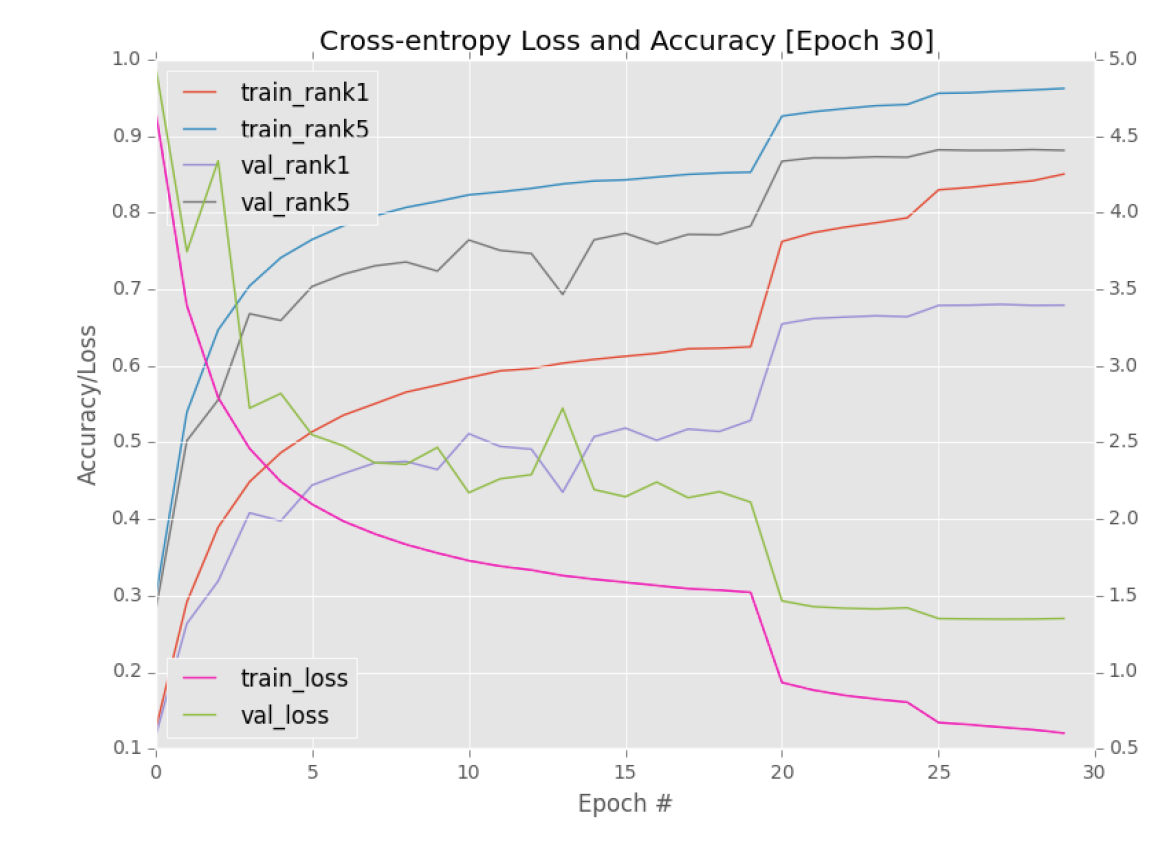

## The CIFAR-10 dataset in more detail
The goal of this exercise is to learn image classifer using the CIFAR10 dataset. This 10-class 32x32x2 image dataset which can be downloaded directly from Keras' datasets.

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:

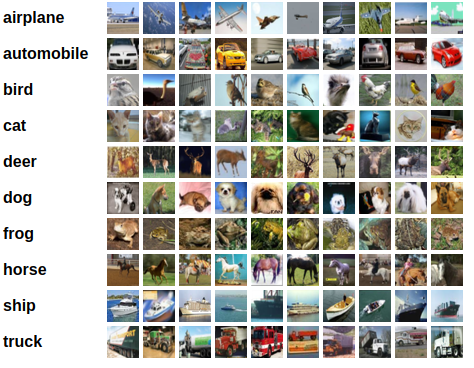

## Get data and specify AlexNet architecture

In [6]:
# (1) Importing dependency
from __future__ import print_function
from __future__ import division

import os
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam


np.random.seed(1000)
from keras.optimizers import Adam



# (2) Get CIFAR10 Dataset
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.
testX /= 255.

batch_size = 100
nb_classes = 10
nb_epoch = 100

img_rows, img_cols = 32, 32
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
# convert to one hot encoing 
y_train = keras.utils.to_categorical(trainY, nb_classes)
y_test = keras.utils.to_categorical(testY, nb_classes)

# (3) Create a sequential model
# AlexNet Define the Model
# Feature BODY - Classification HEAD
model = Sequential()
# FEATURE Body
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
# for original Alexnet 
# CIFAR10 images are only 32x32x3 and not 224x224x3 so use smaller kernel size here
# Also use 96 kernels and not 2 x 48 as in the the original e
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())
# Convolutional Layer 3, 4, 5 
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

# CLASSIFICATION HEAD
model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


print(model.summary())
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 384)         885120    
__________

## Visualize the architecture (RERUN to see the latest version)
(RERUN to see the latest version)
<img src="model_plot1.png" alt="Drawing" style="width: =400px;"/>


In [65]:
history = {"testLoss": [], 
           "testAccuracy": [], 
                }
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)        
        history["testLoss"].append(loss)
        history["testAccuracy"].append(acc)
        print('Testing loss: {}, acc: {}'.format(loss, acc))

Create callback to trace metrics live in TF Tensorboard

In [66]:
from keras.callbacks import ModelCheckpoint, TensorBoard
tb = TensorBoard()

Callback to save best model weights

In [67]:
import os
os.makedirs("./snapshots", exist_ok=True)
mc = ModelCheckpoint("./snapshots/cifar10_cnn_best.h5", save_best_only=True)

Train!

## Train AlexNet on my GPU

### Which GPU am I using?

In [32]:
#Check the GPUs
!nvidia-smi

Mon Nov 26 00:23:29 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.59                 Driver Version: 384.59                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0  On |                  N/A |
| 29%   52C    P2    61W / 250W |  10818MiB / 11171MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   41C    P8    16W / 250W |  11155MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

### Cross check using nvidia-smi  on CMD line


On the command line run and check its output for running `Processes`:

`nvidia-smi`

When running a single GPU machine make sure to kill all processes that are running on your GPU. In the example below, there is one process running on the GPU (PID=1048). You will need to kill this process first using: `sudo kill -9 1048`. If you dont the GPU will run out of memory. Then restart the notebook to engage the GPU.

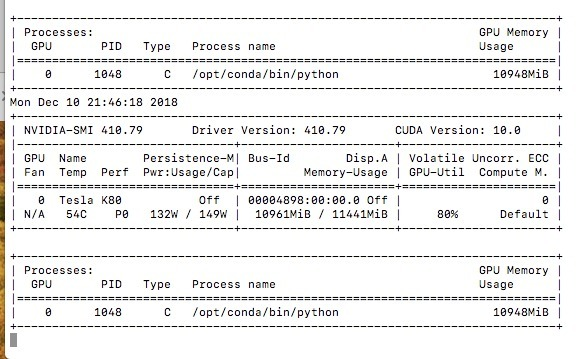

### Output from Jimi's GPU machine

The following is a screenshot from Dr. Shanahan's GPU machine. I have 4 GPU cards: NVIDIA GTX 1080 TI. I should be able to 10TFlops (10 by 10^12 floating point operations, think add and multiply operations.

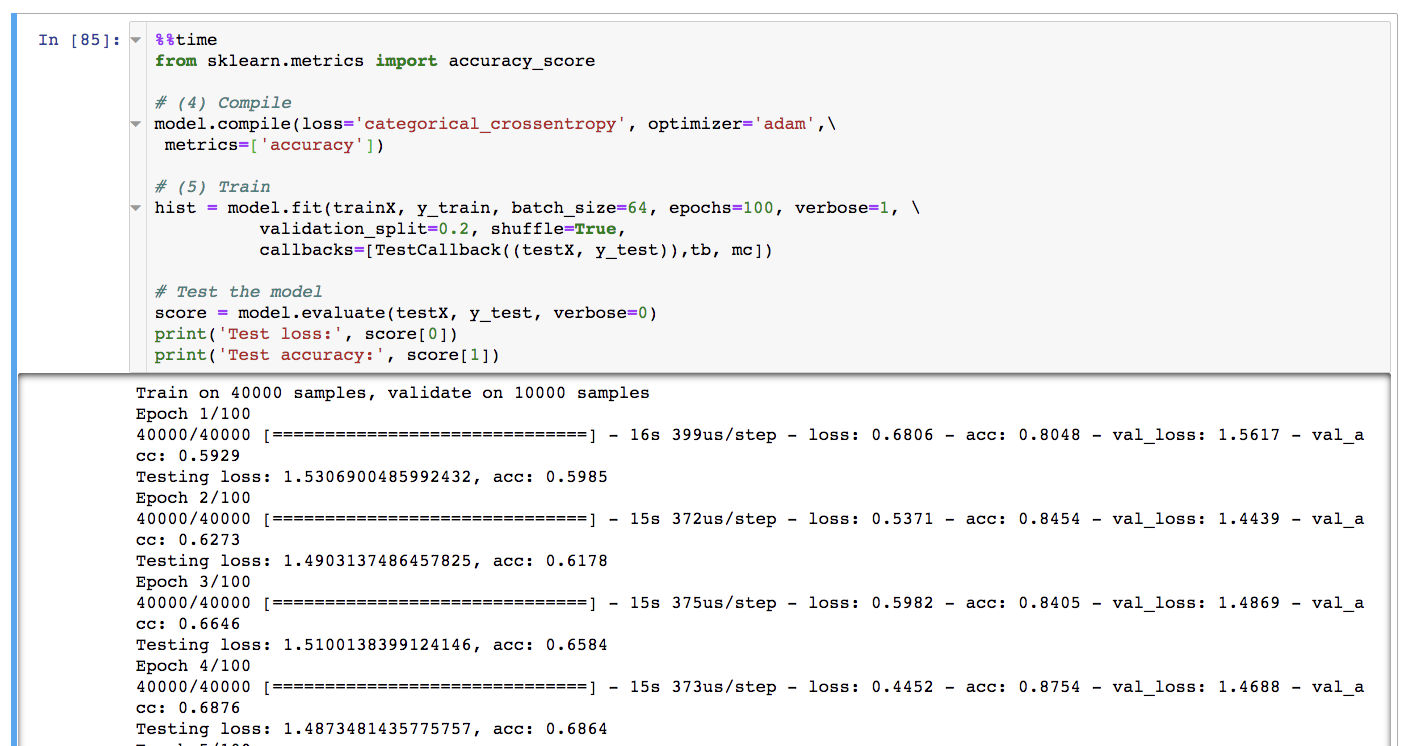

In [85]:
%%time
from sklearn.metrics import accuracy_score

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
hist = model.fit(trainX, y_train, batch_size=64, epochs=100, verbose=1, \
          validation_split=0.2, shuffle=True,
          callbacks=[TestCallback((testX, y_test)),tb, mc])

# Test the model
score = model.evaluate(testX, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 399us/step - loss: 0.6806 - acc: 0.8048 - val_loss: 1.5617 - val_acc: 0.5929
Testing loss: 1.5306900485992432, acc: 0.5985
Epoch 2/100
40000/40000 [==============================] - 15s 372us/step - loss: 0.5371 - acc: 0.8454 - val_loss: 1.4439 - val_acc: 0.6273
Testing loss: 1.4903137486457825, acc: 0.6178
Epoch 3/100
40000/40000 [==============================] - 15s 375us/step - loss: 0.5982 - acc: 0.8405 - val_loss: 1.4869 - val_acc: 0.6646
Testing loss: 1.5100138399124146, acc: 0.6584
Epoch 4/100
40000/40000 [==============================] - 15s 373us/step - loss: 0.4452 - acc: 0.8754 - val_loss: 1.4688 - val_acc: 0.6876
Testing loss: 1.4873481435775757, acc: 0.6864
Epoch 5/100
40000/40000 [==============================] - 15s 378us/step - loss: 0.3592 - acc: 0.9021 - val_loss: 1.4521 - val_acc: 0.7019
Testing loss: 1.4926283460617065, acc: 0.6982
Epoch 6/100
40000/40

40000/40000 [==============================] - 15s 376us/step - loss: 0.4513 - acc: 0.9558 - val_loss: 4.0590 - val_acc: 0.7021
Testing loss: 4.115232385253906, acc: 0.6967
Epoch 46/100
40000/40000 [==============================] - 15s 376us/step - loss: 0.4284 - acc: 0.9582 - val_loss: 4.2910 - val_acc: 0.6845
Testing loss: 4.3330686626434325, acc: 0.6786
Epoch 47/100
40000/40000 [==============================] - 15s 376us/step - loss: 0.3734 - acc: 0.9615 - val_loss: 3.8372 - val_acc: 0.7155
Testing loss: 3.9132160511016845, acc: 0.7105
Epoch 48/100
40000/40000 [==============================] - 15s 378us/step - loss: 0.4064 - acc: 0.9601 - val_loss: 4.1775 - val_acc: 0.7008
Testing loss: 4.265589315032959, acc: 0.6923
Epoch 49/100
40000/40000 [==============================] - 15s 379us/step - loss: 0.5072 - acc: 0.9532 - val_loss: 3.9941 - val_acc: 0.7098
Testing loss: 4.0347941268920895, acc: 0.7074
Epoch 50/100
40000/40000 [==============================] - 15s 373us/step - los

## Save AlexNet training to a .py file 
Save AlexNet to a .py file and run from command line

In [1]:
%%writefile trainAlexNet.py

from sklearn.metrics import accuracy_score



# (1) Importing dependency
from __future__ import print_function
from __future__ import division

import os
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam


np.random.seed(1000)
from keras.optimizers import Adam



# (2) Get CIFAR10 Dataset
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.
testX /= 255.

batch_size = 100
nb_classes = 10
nb_epoch = 100

img_rows, img_cols = 32, 32
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
# convert to one hot encoing 
y_train = keras.utils.to_categorical(trainY, nb_classes)
y_test = keras.utils.to_categorical(testY, nb_classes)

# (3) Create a sequential model
# AlexNet Define the Model
# Feature BODY - Classification HEAD
model = Sequential()
# FEATURE Body
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
# for original Alexnet 
# CIFAR10 images are only 32x32x3 and not 224x224x3 so use smaller kernel size here
# Also use 96 kernels and not 2 x 48 as in the the original e
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same',input_shape=img_dim))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())
# Convolutional Layer 3, 4, 5 
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

# CLASSIFICATION HEAD
model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


print(model.summary())
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

history = {"testLoss": [], 
           "testAccuracy": [], 
                }
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)        
        history["testLoss"].append(loss)
        history["testAccuracy"].append(acc)
        print('Testing loss: {}, acc: {}'.format(loss, acc))

from keras.callbacks import ModelCheckpoint, TensorBoard
tb = TensorBoard()

#Callback to save best model weights
import os
os.makedirs("./snapshots", exist_ok=True)
mc = ModelCheckpoint("./snapshots/cifar10_cnn_best.h5", save_best_only=True)




# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
hist = model.fit(trainX, y_train, batch_size=64, epochs=5, verbose=1, \
          validation_split=0.2, shuffle=True,
          callbacks=[TestCallback((testX, y_test)),tb, mc])

# Test the model
score = model.evaluate(testX, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Writing trainAlexNet.py


In [101]:
history['testAccuracy'][-5:]

[0.7166, 0.6851, 0.6459, 0.6899, 0.6982]

In [99]:
hist.history['val_acc'][-5:]

[0.717, 0.6967, 0.6549, 0.6892, 0.7055]

## Plot learning progress

<Figure size 432x288 with 0 Axes>

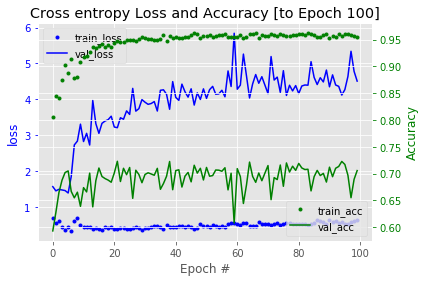

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
if len(hist.history["loss"]) > 1:
    # plot the training loss and accuracy
    N = np.arange(0, len(hist.history["loss"]))
    plt.style.use("ggplot")
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.plot(N, hist.history["loss"], "b.", label="train_loss")
    ax1.plot(N, hist.history["val_loss"], "b", label="val_loss")
    ax1.set_xlabel("Epoch #")
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('loss', color='b')
    ax1.tick_params('y', colors='b')
    color = "g"
    ax2 = ax1.twinx()
    ax2.plot(N, hist.history["acc"], color+".", label="train_acc")
    ax2.plot(N, hist.history["val_acc"], color, label="val_acc")
    plt.title("Cross entropy Loss and Accuracy [to Epoch {}]".format(
        len(hist.history["loss"])))
    ax2.set_ylabel('Accuracy', color=color)
    ax2.tick_params('y', colors=color)

    ax1.legend()
    ax2.legend()

## Load best model

In [110]:
#Load best model
from keras.models import Model, load_model
model = load_model("./snapshots/cifar10_cnn_best.h5")

## Visualize the confusion matrix
Lets plot confusion matrix for this CIFAR dataset.


Confusion matrix, without normalization
[[825  26  19   9  35   1   4  16  17  48]
 [ 27 842   4   6   5   4  22   4   6  80]
 [119   5 547  36 149  52  21  49   7  15]
 [ 38  14  82 437 111 127  42  86  11  52]
 [ 26   3  36  25 758  27  11 101   9   4]
 [ 19  13  44 144  52 583  16 103   6  20]
 [ 23   8  35  51 144  38 655  23   7  16]
 [ 13   4  23   8  49  40   2 834   3  24]
 [188  74  12   6   8   6   2  11 637  56]
 [ 38  90   7   5   6   4  12  23   4 811]]


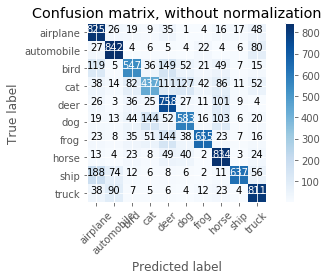

In [122]:
## Visualization of confusion matrix
#The below code takes a confusion matrix and produces a nice and shiny visualization

# import for showing the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

   
results = model.predict(testX)

# convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)

# Names of predicted classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Generate the confusion matrix
cnf_matrix = confusion_matrix(testY, predicted_classes)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Launch Tensorboard

In [ ]:
!tensorboard --logdir=./logs

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
TensorBoard 1.10.0 at http://b3f873e61fce:6006 (Press CTRL+C to quit)


# TASK: Train AlexNet model on Cifar10 data
Using the  code provided above as a basis, please specify AlexNet using the Functional API (as opposed to the sequential API) and train it on the Cifar10 dataset which introduced above with and without data augmentation. 


End of notebook